Our Main idea behind this project is to build an ideal player recommender system based on the data from the FIFA 23 game. It can be an useful tool for the teams to replace an outgoing player. 

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [ ]:
##Importing the dataset
from google.colab import files
uploaded = files.upload()

Saving Fifa 23 Players Data.csv to Fifa 23 Players Data.csv


In [ ]:
df = pd.read_csv('Fifa 23 Players Data.csv',sep=',',header=0, error_bad_lines=False) #reading the dataset
df.head(15)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [ ]:
df.shape #size of the data set

(18539, 89)

In [ ]:
df.ndim#dimensions

2

In [ ]:
df.isnull().sum() #total null values in each column

Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

It looks like there are no null values in the data set. So let's go ahead and do some data exploration to comprehend it in a more detailed way.

In [ ]:
df['Best Position'].value_counts() #total number of players for each position.

CB     3658
ST     2565
CAM    2311
GK     2061
RM     1443
CDM    1403
CM     1104
RB      925
LB      864
LM      797
RWB     422
LWB     404
RW      297
LW      215
CF       70
Name: Best Position, dtype: int64

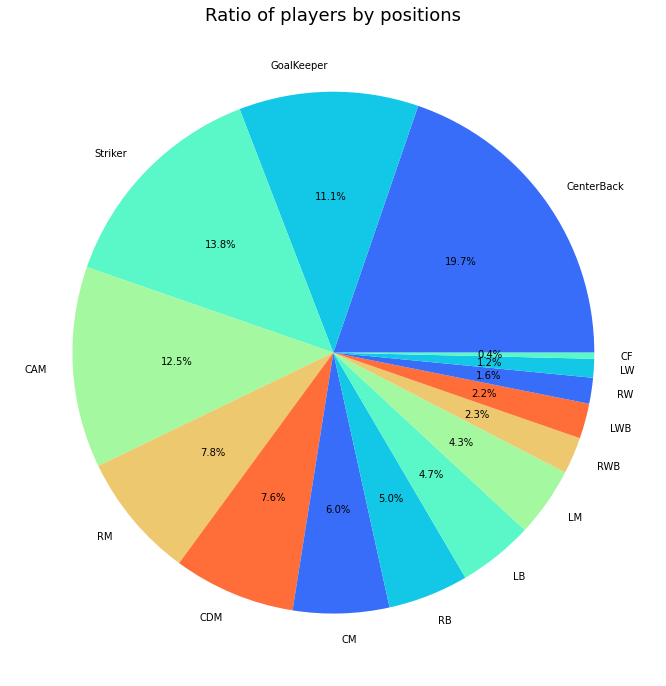

In [ ]:
centerback = len(df[df['Best Position'] == 'CB'])
Goalkeeper = len(df[df['Best Position'] == 'GK'])
Striker = len(df[df['Best Position'] == 'ST'])
centralattackingmidfielder = len(df[df['Best Position'] == 'CAM'])
Rightmidfielder = len(df[df['Best Position'] == 'RM'])
centraldefensivemidfielder = len(df[df['Best Position'] == 'CDM'])
Centralmidfielder = len(df[df['Best Position'] == 'CM'])
Rightback = len(df[df['Best Position'] == 'RB'])
Leftback = len(df[df['Best Position'] == 'LB'])
leftmidfielder = len(df[df['Best Position'] == 'LM'])
Rightwingback = len(df[df['Best Position'] == 'RWB'])
Leftwingback = len(df[df['Best Position'] == 'LWB'])
Rightwinger = len(df[df['Best Position'] == 'RW'])
Leftwinger = len(df[df['Best Position'] == 'LW'])
Centerforward = len(df[df['Best Position'] == 'CF'])

labels = 'CenterBack','GoalKeeper','Striker','CAM','RM','CDM','CM','RB','LB','LM', 'RWB', 'LWB', 'RW', 'LW', 'CF'
sizes = [centerback, Goalkeeper,Striker,centralattackingmidfielder,Rightmidfielder,centraldefensivemidfielder,Centralmidfielder,Rightback, Leftback,leftmidfielder, Rightwingback, Leftwingback, Rightwinger, Leftwinger, Centerforward]
plt.figure(figsize=(18,12))

plt.pie(sizes, labels=labels, colors=sns.color_palette("rainbow"),
autopct='%1.1f%%')
plt.title('Ratio of players by positions', fontsize=18)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


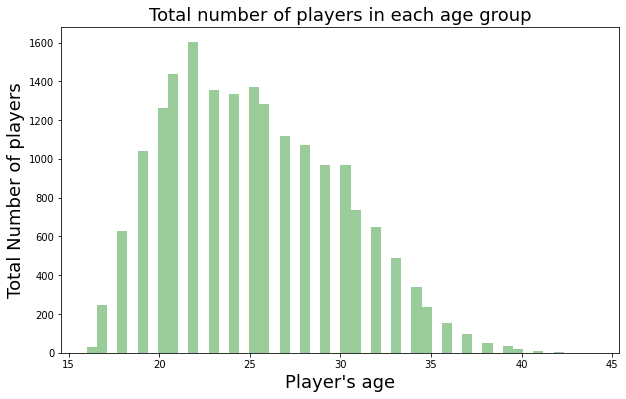

In [ ]:
x = df.Age
plt.figure(figsize = (10,6))
z = sns.distplot(x, bins = 50, kde = False, color = 'g')
z.set_xlabel(xlabel = "Player\'s age", fontsize = 18)
z.set_ylabel(ylabel = 'Total Number of players', fontsize = 18)
z.set_title(label = 'Total number of players in each age group', fontsize = 18)
plt.show() #histogram of total number of players in each age group

In [ ]:
df['Nationality'].value_counts()

England          1632
Germany          1204
Spain            1074
France            963
Argentina         937
                 ... 
Bermuda             1
Kazakhstan          1
Liechtenstein       1
Korea DPR           1
Barbados            1
Name: Nationality, Length: 160, dtype: int64

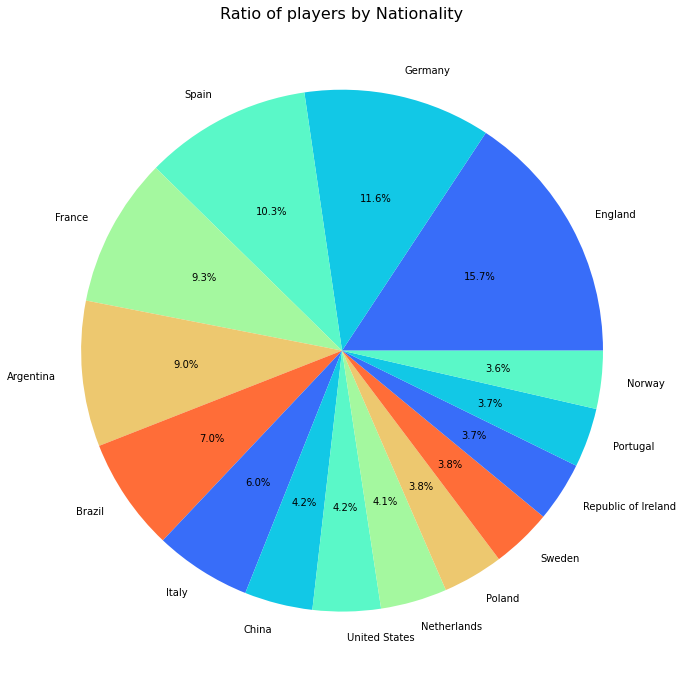

In [ ]:
England = len(df[df['Nationality'] == 'England'])
Germany = len(df[df['Nationality'] == 'Germany'])
Spain = len(df[df['Nationality'] == 'Spain'])
France = len(df[df['Nationality'] == 'France'])
Argentina = len(df[df['Nationality'] == 'Argentina'])
Brazil = len(df[df['Nationality'] == 'Brazil'])
Italy = len(df[df['Nationality'] == 'Italy'])
China = len(df[df['Nationality'] == 'China PR'])
UnitedStates = len(df[df['Nationality'] == 'United States'])
Netherlands = len(df[df['Nationality'] == 'Netherlands'])
Poland = len(df[df['Nationality'] == 'Poland'])
Sweden = len(df[df['Nationality'] == 'Sweden'])
RepublicOfIreland = len(df[df['Nationality'] == 'Republic of Ireland'])
Portugal = len(df[df['Nationality'] == 'Portugal'])
Norway = len(df[df['Nationality'] == 'Norway'])

labels = 'England','Germany','Spain','France','Argentina','Brazil','Italy','China','United States','Netherlands', 'Poland', 'Sweden', 'Republic of Ireland', 'Portugal', 'Norway'
sizes = [England,Germany,Spain,France,Argentina,Brazil,Italy,China,UnitedStates,Netherlands, Poland, Sweden, RepublicOfIreland, Portugal, Norway]
plt.figure(figsize=(16,12))

plt.pie(sizes, labels=labels, colors=sns.color_palette("rainbow"),
autopct='%1.1f%%')
plt.title('Ratio of players by Nationality', fontsize=16)
plt.show()# pie chart of the top 15 most represented nationalities in this dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


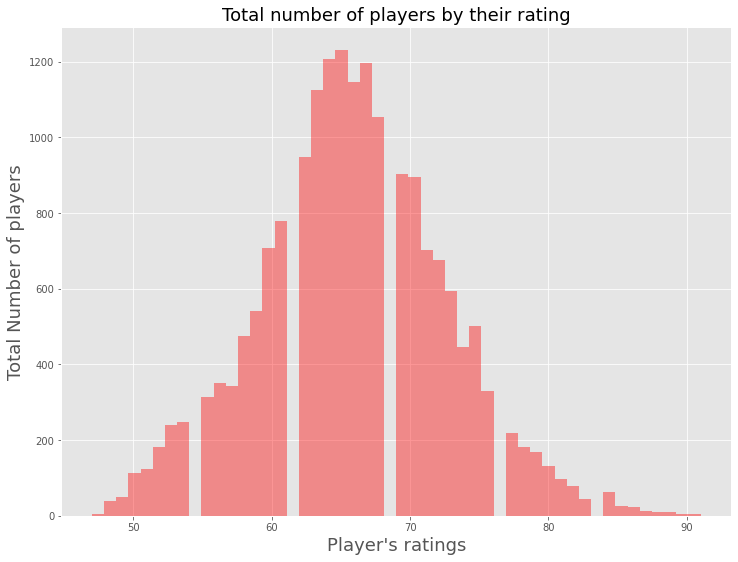

In [ ]:
x = df.Overall
plt.figure(figsize = (12,9))
plt.style.use('ggplot')

z1 = sns.distplot(x, bins = 50, kde = False, color = 'r')
z1.set_xlabel(xlabel = "Player\'s ratings", fontsize = 18)
z1.set_ylabel(ylabel = 'Total Number of players', fontsize = 18)
z1.set_title(label = 'Total number of players by their rating', fontsize = 18)
plt.show()

Usually players with better ball control have good dribilling skills. In a nut shell these traits are correlated. So we have decided to do regression plots on these traits to see what our data reflects. Also let's use this as an oppurtunity to compare right and left footed players.



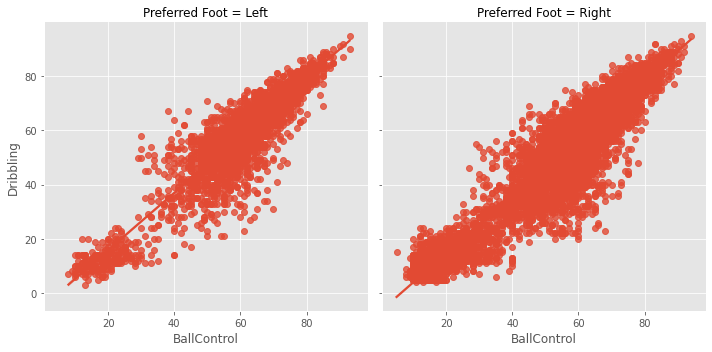

In [ ]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df, col = 'Preferred Foot')
plt.show()


It looks like they are correlated just as we predicted.

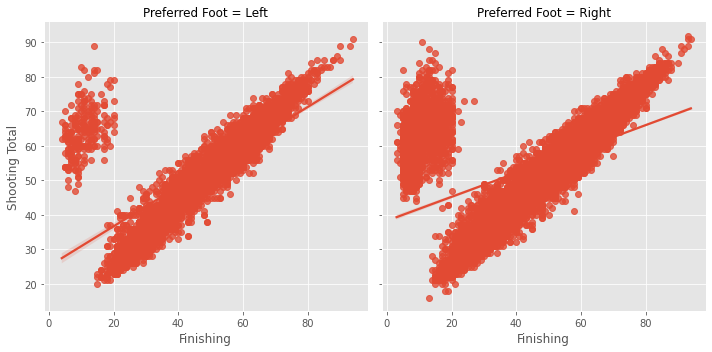

In [ ]:
sns.lmplot(x = 'Finishing', y = 'Shooting Total', data = df, col = 'Preferred Foot')
plt.show()

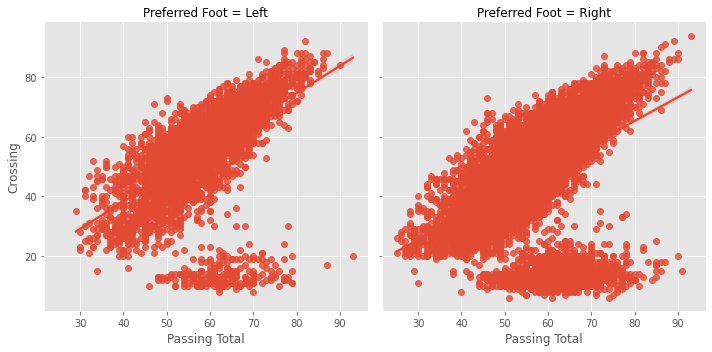

In [ ]:
sns.lmplot(x = 'Passing Total', y = 'Crossing', data = df, col = 'Preferred Foot')
plt.show()

Just like in the earlier case, (finishing and shooting) and (passing and crossing) are also correlated to a certain extent but they do vary sometimes depending on the position of the player. That is part of the reason why a negative correlation can be seen at certain phases in the graph. 

In [ ]:
df.corr()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Overall,1.000000,0.660630,0.561642,0.442369,0.033137,0.131420,0.608002,0.843720,0.599129,0.531458,...,0.472606,0.541536,0.472606,0.451583,0.479747,0.451583,0.428254,0.400783,0.428254,0.044462
Potential,0.660630,1.000000,0.532835,-0.263686,0.017489,-0.003973,0.372469,0.526546,0.497392,0.509867,...,0.348049,0.370327,0.348049,0.291078,0.294840,0.291078,0.270494,0.227643,0.270494,-0.002057
Value(in Euro),0.561642,0.532835,1.000000,0.030662,0.008028,0.027106,0.341551,0.468076,0.822262,0.976244,...,0.295886,0.321575,0.295886,0.252712,0.259591,0.252712,0.234933,0.202809,0.234933,0.011339
Age,0.442369,-0.263686,0.030662,1.000000,0.066684,0.217895,0.246279,0.381901,0.144251,0.025078,...,0.091072,0.166533,0.091072,0.141274,0.193036,0.141274,0.142184,0.183151,0.142184,0.132966
Height(in cm),0.033137,0.017489,0.008028,0.066684,1.000000,0.754845,-0.382480,-0.123239,0.025430,0.006404,...,-0.464597,-0.387355,-0.464597,-0.321388,-0.212100,-0.321388,-0.271875,-0.088695,-0.271875,0.369929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RWB Rating,0.451583,0.291078,0.252712,0.141274,-0.321388,-0.257192,0.885559,0.470957,0.271175,0.238489,...,0.819394,0.896510,0.819394,1.000000,0.977241,1.000000,0.993319,0.927139,0.993319,-0.744169
LB Rating,0.428254,0.270494,0.234933,0.142184,-0.271875,-0.215549,0.840970,0.433111,0.253928,0.222359,...,0.755647,0.849648,0.755647,0.993319,0.984470,0.993319,1.000000,0.959383,1.000000,-0.724081
CB Rating,0.400783,0.227643,0.202809,0.183151,-0.088695,-0.044569,0.720341,0.353803,0.229538,0.192411,...,0.584842,0.725680,0.584842,0.927139,0.967690,0.927139,0.959383,1.000000,0.959383,-0.635901
RB Rating,0.428254,0.270494,0.234933,0.142184,-0.271875,-0.215549,0.840970,0.433111,0.253928,0.222359,...,0.755647,0.849648,0.755647,0.993319,0.984470,0.993319,1.000000,0.959383,1.000000,-0.724081


In [ ]:
df.loc[df.groupby(df['Best Position'])['Overall'].idxmax()][['Best Position', 'Full Name', 'Age', 'Club Name', 'Nationality', 'Overall', 'Potential']]
#highest rated players in their respective positions.


,Best Position,Full Name,Age,Club Name,Nationality,Overall,Potential
0,CAM,Lionel Messi,35,Paris Saint-Germain,Argentina,91,91
9,CB,Virgil van Dijk,30,Liverpool,Netherlands,90,90
13,CDM,Carlos Henrique Venancio Casimiro,30,Manchester United,Brazil,89,89
1,CF,Karim Benzema,34,Real Madrid CF,France,91,91
3,CM,Kevin De Bruyne,31,Manchester City,Belgium,91,91
6,GK,Thibaut Courtois,30,Real Madrid CF,Belgium,90,91
24,LB,João Pedro Cavaco Cancelo,28,Manchester City,Portugal,88,88
15,LM,Sadio Mané,30,FC Bayern München,Senegal,89,89
11,LW,Neymar da Silva Santos Jr.,30,Paris Saint-Germain,Brazil,89,89
86,LWB,Theo Hernández,24,AC Milan,France,85,90


In [ ]:
future_guide = df[(df['Overall']>65) & (df['Potential'] - df['Overall']>=15)].sort_values(by='Overall')
future_guide.head(100) # A look at the best young talent from around the globe, these next gen players could potentially turn out to be the superstars in the making.

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
9508,D. Kameri,Dijon Kameri,66,83,2200000,CAM,CAM,Austria,https://cdn.sofifa.net/players/270/999/23_60.png,18,...,67,64,67,57,55,57,55,50,55,19
8435,L. Delap,Liam Delap,66,84,2200000,ST,ST,England,https://cdn.sofifa.net/players/259/031/23_60.png,19,...,61,55,61,45,44,45,43,43,43,17
8469,É. Michut,Édouard Michut,66,84,2200000,CM,CAM,France,https://cdn.sofifa.net/players/261/249/23_60.png,19,...,67,68,67,64,65,64,63,59,63,18
8530,J. Sforza,Juan Sforza,66,81,2100000,"CM,CDM",CM,Argentina,https://cdn.sofifa.net/players/258/289/23_60.png,20,...,67,68,67,66,66,66,65,63,65,19
8573,L. Delaurier-Chaubet,Logan Delaurier-Chaubet,66,83,2200000,"LW,RW",LM,France,https://cdn.sofifa.net/players/256/843/23_60.png,20,...,69,63,69,53,49,53,49,38,49,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,J. Gelhardt,Joe Gelhardt,72,87,5500000,"ST,CAM",CAM,England,https://cdn.sofifa.net/players/246/053/23_60.png,20,...,72,67,72,53,53,53,49,46,49,19
3018,F. Miretti,Fabio Miretti,72,87,5500000,"CM,CDM",CAM,Italy,https://cdn.sofifa.net/players/268/802/23_60.png,18,...,74,74,74,73,72,73,71,67,71,20
2922,R. Cherki,Rayan Cherki,73,88,7000000,"LW,ST,RW",CAM,France,https://cdn.sofifa.net/players/251/570/23_60.png,18,...,74,66,74,52,50,52,47,39,47,18
1714,Moleiro,Alberto Moleiro González,75,90,13000000,"LM,CM,CAM",CAM,Spain,https://cdn.sofifa.net/players/264/388/23_60.png,18,...,76,74,76,63,63,63,61,56,61,17


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total number of young prospects by Overall rating according to our guide')

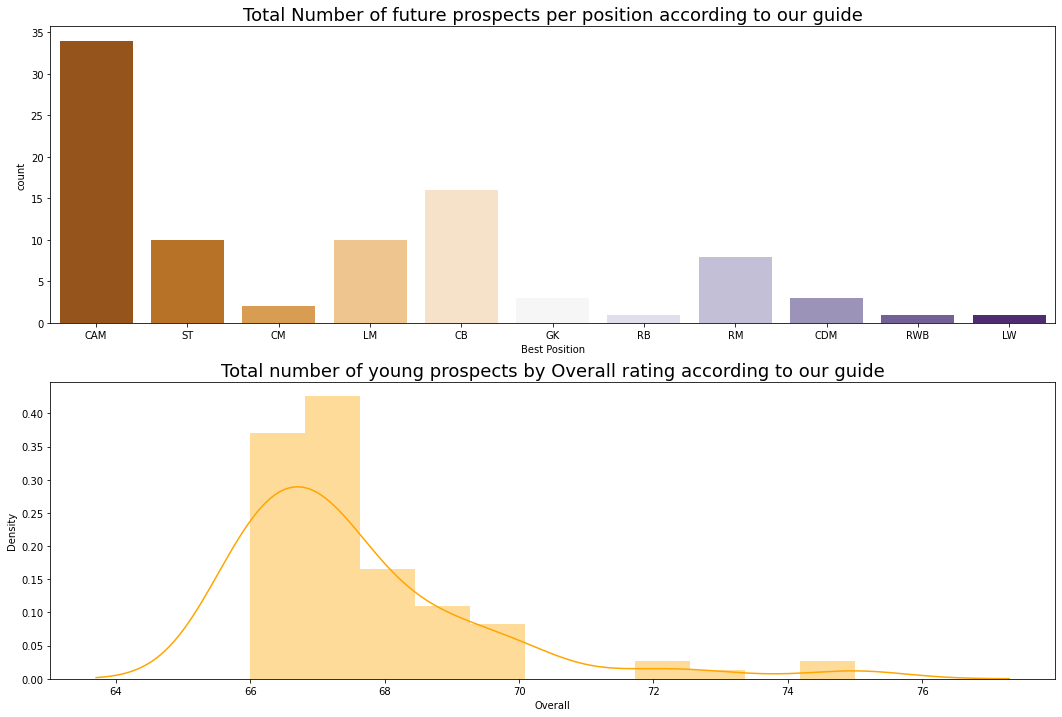

In [ ]:
fig, graph = plt.subplots(nrows=2, figsize=(18, 12))
sns.countplot(future_guide['Best Position'], palette="PuOr", ax=graph[0])
graph[0].set_title('Total Number of future prospects per position according to our guide', fontsize=18)
sns.distplot(future_guide['Overall'],color="Orange", ax=graph[1])
graph[1].set_title('Total number of young prospects by Overall rating according to our guide', fontsize=18) # A look at the how the data is distributed with respected to the future_guide dataframe

In [ ]:
df.drop(['Known As','Nationality','Release Clause','Wage(in Euro)','Image Link', 'Club Position', 'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan', 'International Reputation','National Team Name', 'National Team Image Link','National Team Position', 'National Team Jersey Number', 'Attacking Work Rate', 'Defensive Work Rate', 'Value(in Euro)', 'Positions Played', 'Club Name', 'Preferred Foot'],
        axis=1,inplace=True) # dropping all the columns we will not be using in the process of building our tool

In [ ]:
df.shape

(18539, 68)

In [ ]:
df.ndim

2

In [ ]:
df.head()

,Full Name,Overall,Potential,Best Position,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Weak Foot Rating,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,Lionel Messi,91,91,CAM,35,169,67,2190,452,4,...,91,88,91,67,66,67,62,53,62,22
1,Karim Benzema,91,91,CF,34,185,81,2147,455,4,...,89,84,89,67,67,67,63,58,63,21
2,Robert Lewandowski,91,91,ST,33,185,81,2205,458,4,...,86,83,86,67,69,67,64,63,64,22
3,Kevin De Bruyne,91,91,CM,31,181,70,2303,483,5,...,91,91,91,82,82,82,78,72,78,24
4,Kylian Mbappé,91,95,ST,23,182,73,2177,470,4,...,92,84,92,70,66,70,66,57,66,21


In [ ]:
traits = df.iloc[:, 4:]# separating columns with just the numerical data
new_df= traits # we will be using the new_df dataframe in the final phase of our analysis
traits = traits.dropna()
new_df['Full Name'] = df['Full Name']
new_df['Best Position'] = df['Best Position']
new_df = new_df.dropna()
print(traits.columns)

Index(['Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Weak Foot Rating', 'Skill Moves', 'Pace Total', 'Shooting Total',
       'Passing Total', 'Dribbling Total', 'Defending Total',
       'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'Freekick Accuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeper Diving', 'Goalkeeper Handling',
       ' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes',
       'ST Rating', 'LW Rating', 'LF Rating', 'CF Rating', 'RF Rating',
       'RW Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating',
       'LWB Rating', 'CDM Rating', 'RWB Rating'

In [ ]:
Scaler = StandardScaler()
Scaled_df = Scaler.fit_transform(traits)

In [ ]:
Suggestions = NearestNeighbors(n_neighbors=4,algorithm='kd_tree')
Suggestions.fit(Scaled_df)

NearestNeighbors(algorithm='kd_tree', n_neighbors=4)

In [ ]:
Target = Suggestions.kneighbors(Scaled_df)[1]

In [ ]:
def connect(x):
    return new_df[new_df['Full Name']==x].index.tolist()[0]#Creating a clustered list

def Suggestion(player_name):
    print("Here are our recommended replacements for {} : ".format(player_name))
    select= connect(player_name) # calling the 'connect' function we defined above to return the row of the player user is looking for.
    for i in Target[select][1:]:# Using the k-nearest neighbours algoritham we defined in previous cells to find 3 players (by iterating it 3 times) with most similar attributes
        print("Full Name: {0}\nBest Position: {1}\nOverall Rating: {2}\nSpeed: {3}\nshooting: {4}\npassing: {5}\ndribbling: {6}\ndefending: {7}\nphysicality: {8}\n".format(df.iloc[i]['Full Name'],df.iloc[i]['Best Position'],df.iloc[i]['Overall'],df.iloc[i]['Pace Total'],df.iloc[i]['Shooting Total'],df.iloc[i]['Passing Total'],df.iloc[i]['Dribbling Total'],df.iloc[i]['Defending Total'],df.iloc[i]['Physicality Total']))

In [ ]:
Suggestion('Lionel Messi') #Messi is a forward, who also happens to play as a CAM occasionaoly, All our results are in line with that.

Here are our recommended replacements for Lionel Messi : 
Full Name: Neymar da Silva Santos Jr.
Best Position: LW
Overall Rating: 89
Speed: 87
shooting: 83
passing: 85
dribbling: 93
defending: 37
physicality: 61

Full Name: Paulo Dybala
Best Position: CAM
Overall Rating: 86
Speed: 80
shooting: 85
passing: 85
dribbling: 90
defending: 40
physicality: 59

Full Name: Eden Hazard
Best Position: LW
Overall Rating: 84
Speed: 83
shooting: 80
passing: 82
dribbling: 87
defending: 35
physicality: 63



In [ ]:
Suggestion('Virgil van Dijk') # Van Dijk is a center back and all our results are in line with that.

Here are our recommended replacements for Virgil van Dijk : 
Full Name: Antonio Rüdiger
Best Position: CB
Overall Rating: 87
Speed: 82
shooting: 53
passing: 71
dribbling: 67
defending: 86
physicality: 85

Full Name: Jan Vertonghen
Best Position: CB
Overall Rating: 81
Speed: 69
shooting: 62
passing: 72
dribbling: 67
defending: 83
physicality: 78

Full Name: Matthijs de Ligt
Best Position: CB
Overall Rating: 85
Speed: 75
shooting: 59
passing: 61
dribbling: 69
defending: 84
physicality: 87



In [ ]:
Suggestion('Thibaut Courtois')# Courtois is a Goalkeeper

Here are our recommended replacements for Thibaut Courtois : 
Full Name: Wojciech Szczęsny
Best Position: GK
Overall Rating: 86
Speed: 86
shooting: 81
passing: 73
dribbling: 87
defending: 49
physicality: 86

Full Name: Gianluigi Donnarumma
Best Position: GK
Overall Rating: 88
Speed: 90
shooting: 83
passing: 79
dribbling: 89
defending: 52
physicality: 85

Full Name: Alphonse Areola
Best Position: GK
Overall Rating: 81
Speed: 85
shooting: 79
passing: 75
dribbling: 84
defending: 55
physicality: 78

